In [3]:
%matplotlib inline
# You need to have caffe installed with python support, and the BVLC reference models
# downloadad.  Please refer to the caffe website/codebase for instructions.
import caffe
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

In [4]:
caffe_root = '/home/yeze/Documents/caffe/'  # point this to wherever you placed caffe
caffe.set_mode_gpu()
# NOTE: you must change deploy.prototxt to include "force_backward: true"
net = caffe.Net(caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt',
                caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
                caffe.TEST)
net.blobs['data'].reshape(1,3,227,227)
means = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)

iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


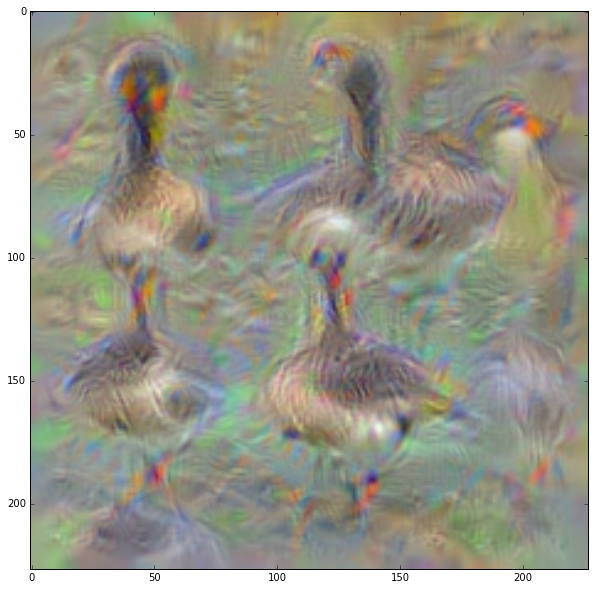

In [5]:
# pick a target class:
#target_label = 954 # banana
target_label = 99 # goose
# target_label = 543 # dumbell
# target_label = 546 # electric guitar
# target_label = 282 # tiger cat
#target_label = 281 # tabby cat

# start with a random image
current = np.random.rand(3,227,227)*255 - means[:,None,None]
act_hist = []

# learning rates -- play with these for different looking results
rate_smooth = 0.25
rate_obj = 5000
IT = 1000
for it in range(IT):
    if it > 0 and it%100 == 0: print 'iteration {}'.format(it)
    # do a forward pass for the current version of the image
    # and collect the target activation to visualize later
    net.blobs['data'].data[...] = current
    act_hist.append(net.forward(end='fc8')['fc8'].flat[target_label])
    # set the topmost diff and do a backward pass back to the image
    # can also try: `np.arange(1000)==target_label`
    net.blobs['fc8'].diff[...].flat = 2*(np.arange(1000)==target_label)-1
    diff = net.backward(start='fc8')['data']
    # compute smoothness regularization
    x_diff = np.zeros_like(current)
    y_diff = np.zeros_like(current)
    r = np.random.rand()
    if r > 0.7:
        y_diff[:,1:,:] = (current[:,1:,:] - current[:,:-1,:])
        x_diff[:,:,1:] = (current[:,:,1:] - current[:,:,:-1])
    elif r < 0.3:
        y_diff[:,:-1,:] = (-current[:,1:,:] + current[:,:-1,:])
        x_diff[:,:,:-1] = (-current[:,:,1:] + current[:,:,:-1])
    # gradient descent step
    current = current + rate_obj*diff[0] - rate_smooth*x_diff - rate_smooth*y_diff

# show the picture
image = (current + means[:,None,None]).transpose(1,2,0)[:,:,[2,1,0]]
image = image - image.min()
image = image/image.max()
plt.imshow(image)
plt.imsave('lb{}iter{}sm{}obj{}_randStay.png'.format(target_label, IT, rate_smooth,rate_obj),image)

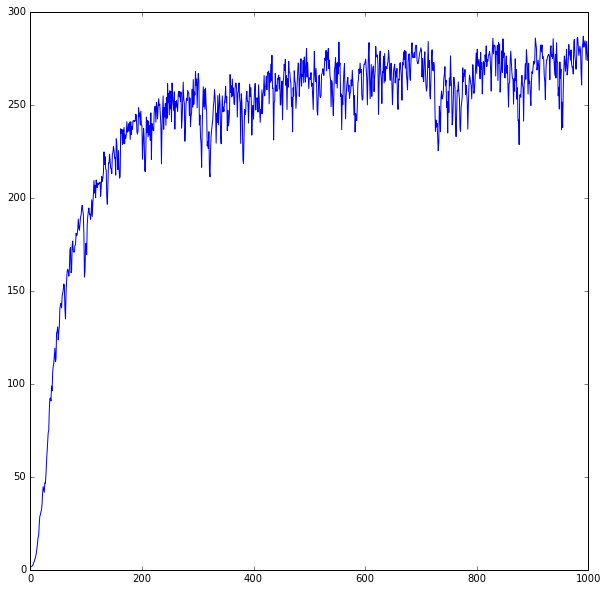

In [30]:
# plot the target activation throughout training
plt.plot(act_hist)

In [34]:
# plot class distribution
plt.plot(net.forward(end='loss')['loss'].flat)

ValueError: 'loss' is not in list

In [ ]:
comment:
    this prj is a basic learn of Google Deep Dream
    I fount it quite amazing for using CNN to generate pictures
    Now I will start to work on MNIST data set